In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from bioinfokit.analys import stat

from scipy.stats import levene

In [2]:
alpha=0.05
# load data file
d = pd.read_csv("twowayANOVA2.txt", sep="\t")
 
d_melt = pd.melt(d, id_vars=['Type'], value_vars=['Year1', 'Year2', 'Year3'])

# replace column names
d_melt.columns = ['Type', 'Years', 'Value']
d_melt

,Type,Years,Value
0,A,Year1,1.530
1,A,Year1,1.830
2,A,Year1,1.380
3,A,Year1,1.430
4,A,Year1,1.355
...,...,...,...
103,F,Year3,9.870
104,F,Year3,10.080
105,F,Year3,10.170
106,F,Year3,10.290


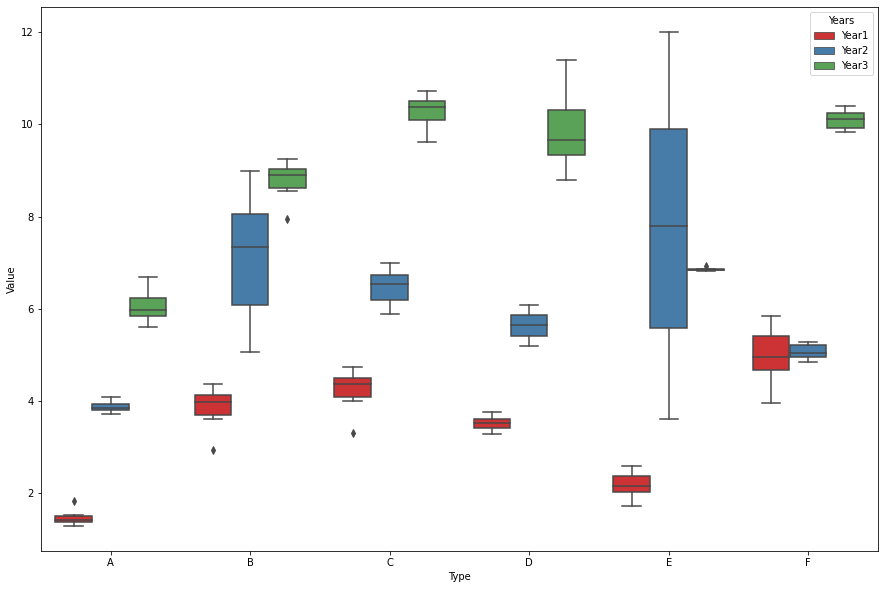

In [3]:
fig, ax = plt.subplots(figsize=(15,10)) #Setting size of the canvas

sns.boxplot(x="Type", y="Value", hue="Years", data=d_melt, palette="Set1") 
plt.show()

In [4]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=d_melt, res_var='Value', anova_model='Value~C(Type)+C(Years)+C(Type):C(Years)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Type),5.0,125.050710,25.010142,29.581887,1.189507e-17
C(Years),2.0,504.995467,252.497733,298.653220,1.858422e-40
C(Type):C(Years),10.0,84.841833,8.484183,10.035055,4.068157e-11
Residual,90.0,76.090912,0.845455,NaN,NaN


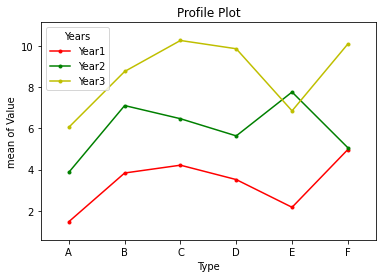

In [5]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig = interaction_plot(x=d_melt['Type'], trace=d_melt['Years'], response=d_melt['Value'], 
    colors=['r','g', 'y'])

plt.title("Profile Plot")
plt.show()

In [6]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect Genotype
res.tukey_hsd(df=d_melt, res_var='Value', xfac_var='Type', anova_model='Value~C(Type)+C(Years)+C(Type):C(Years)')
res.tukey_summary

C:\Users\Ntinos Ziakas\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,2.775000,1.882498,3.667502,12.804249,0.001000
1,A,C,3.190833,2.298331,4.083336,14.722963,0.001000
2,A,D,2.545000,1.652498,3.437502,11.742996,0.001000
3,A,E,1.800000,0.907498,2.692502,8.305459,0.001000
4,A,F,2.918333,2.025831,3.810836,13.465609,0.001000
5,B,C,0.415833,-0.476669,1.308336,1.918715,0.725742
6,B,D,0.230000,-0.662502,1.122502,1.061253,0.900000
7,B,E,0.975000,0.082498,1.867502,4.498790,0.023903
8,B,F,0.143333,-0.749169,1.035836,0.661361,0.900000
9,C,D,0.645833,-0.246669,1.538336,2.979968,0.293123


In [7]:
# for main effect years
res.tukey_hsd(df=d_melt, res_var='Value', xfac_var='Years', anova_model='Value ~ C(Type) + C(Years) + C(Type):C(Years)')
res.tukey_summary

C:\Users\Ntinos Ziakas\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Year1,Year2,2.626667,2.110169,3.143165,17.140010,0.001
1,Year1,Year3,5.296667,4.780169,5.813165,34.562787,0.001
2,Year2,Year3,2.670000,2.153502,3.186498,17.422777,0.001


In [8]:
# for interaction effect between genotype and years
res.tukey_hsd(df=d_melt, res_var='Value', xfac_var=['Type','Years'], anova_model='Value ~ C(Type) + C(Years) + C(Type):C(Years)')
res.tukey_summary.head()

C:\Users\Ntinos Ziakas\anaconda3\lib\site-packages\bioinfokit\analys.py:368: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(A, Year1)","(A, Year2)",2.4025,0.495454,4.309546,6.400205,0.002312
1,"(A, Year1)","(A, Year3)",4.5925,2.685454,6.499546,12.234315,0.001000
2,"(A, Year1)","(B, Year1)",2.3675,0.460454,4.274546,6.306966,0.002937
3,"(A, Year1)","(B, Year2)",5.6475,3.740454,7.554546,15.044811,0.001000
4,"(A, Year1)","(B, Year3)",7.3050,5.397954,9.212046,19.460353,0.001000


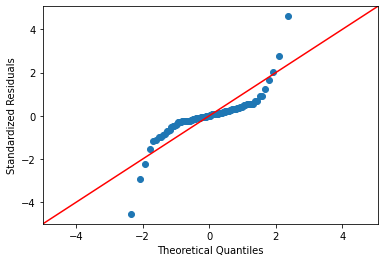

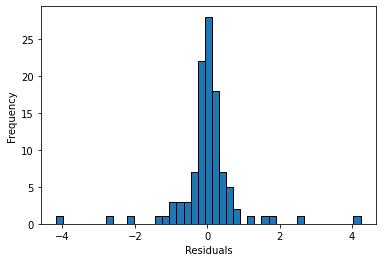

In [9]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()



In [10]:
#Shapiro-Wilk test

import scipy.stats as stats

w, pvalue = stats.shapiro(res.anova_model_out.resid)

print('===============================================================================================================================')
print("Shapiro-Wilk test\n\nH0: The data is drawn from normal distribution.")
print("H1: The data is NOT drawn from normal distribution.\n")

print('===============================================================================================================================')
print("W-Statistic = ""%.3f" % w,"\np-value = ""%.4f" % pvalue)
print('===============================================================================================================================')
print()
print("-----------------------------------------")
print(": Results :")
if(pvalue < alpha ):
    print("-----------------------------------------")
    print()
    print("Reject the null hypothesis")
    print("Accept the alternative.") 
    print("The data is NOT drawn from normal distribution.") 
    print()  
    print("-----------------------------------------")
    
    
    #Levene’s test 
    
    
    from bioinfokit.analys import stat 
    print('===============================================================================================================================')
    print("Levene’s test \n\nH0: The samples from populations have equal variances.")
    print("H1: The samples from populations have NOT equal variances.")
    print('===============================================================================================================================')
    
    res = stat()
    res.levene(df=d_melt, res_var='Value', xfac_var='Type')
    
    from scipy.stats import levene

    stats.levene(list2,list3,list4)
    stat, p = levene(list2,list3,list4)
    
    if(p < alpha ):
        print("-----------------------------------------")
        print()
        print("Reject the null hypothesis")
        print("Accept the alternative.") 
        print("The samples from populations have equal NOT variances.")
        
        print()  
        print("-----------------------------------------")
    else:
        print("-----------------------------------------")
        print("Retain the null.") 
        print("The samples from populations have equal variances.") 
        print("-----------------------------------------")
        print("-----------------------------------------")
    print(res.levene_summary)
    print("\nVariances :",np.round([np.var(x, ddof=1) for x in [list2,list3,list4]],2))
    print()

    
    
else:
    print("-----------------------------------------")
    print("Retain the null.") 
    print("The data is drawn from normal distribution.") 
    print("-----------------------------------------")
    print("-----------------------------------------\n")
    print('===============================================================================================================================')

    print("\nHomogeneity of Variances\n")

    
    #Homogeneity of Variances

    
    import scipy.stats as stats
    w, pvalue = stats.bartlett(df['Year1'], df['Year2'], df['Year3'])
    from bioinfokit.analys import stat 
    res = stat()
    res.bartlett(df=d_melt, res_var='Value', xfac_var='Type')
    
    print('===============================================================================================================================')
    print("Bartlett’s test test\n\nH0: The samples from populations have equal variances.")
    print("H1: The samples from populations have NOT equal variances.\n")

    print('===============================================================================================================================')
    print("B-Statistic = ""%.3f" % w,"\np-value = ""%.4f" % pvalue)
    print('===============================================================================================================================')
    print()    
    print("-----------------------------------------")
    print(": Results :")
    if(pvalue < alpha ):
        print("-----------------------------------------")
        print()
        print("Reject the null hypothesis")
        print("Accept the alternative.") 
        print("The samples from populations have NOT equal variances.") 
        print()  
        print("-----------------------------------------")
    else:
        print("-----------------------------------------")
        print("Retain the null.") 
        print("The samples from populations have equal variances.") 
        print("-----------------------------------------")
        print("-----------------------------------------")

    from bioinfokit.analys import stat 

    print(res.bartlett_summary)

    
    

Shapiro-Wilk test

H0: The data is drawn from normal distribution.
H1: The data is NOT drawn from normal distribution.

W-Statistic = 0.761 
p-value = 0.0000

-----------------------------------------
: Results :
-----------------------------------------

Reject the null hypothesis
Accept the alternative.
The data is NOT drawn from normal distribution.

-----------------------------------------
Levene’s test 

H0: The samples from populations have equal variances.
H1: The samples from populations have NOT equal variances.


NameError: name 'list2' is not defined

In [ ]:
# Shapiro-Wilk test
import scipy.stats as stats
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)

In [ ]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=d_melt, res_var='Value', xfac_var=['Type', 'Years'])
res.levene_summary
